# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

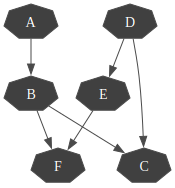

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)

In [5]:
cr.computeBinaryCPTMinMax()

In [6]:
print(cr)


A:Range([0,1])
<> : [[0.776911 , 0.223089] , [0.77691 , 0.22309]]

B:Range([0,1])
<A:0> : [[0.740924 , 0.259076] , [0.740921 , 0.259079]]
<A:1> : [[0.502721 , 0.497279] , [0.502637 , 0.497363]]

C:Range([0,1])
<B:0|D:0> : [[0.43648 , 0.56352] , [0.436241 , 0.563759]]
<B:1|D:0> : [[0.89709 , 0.10291] , [0.000491307 , 0.999509]]
<B:0|D:1> : [[0.465249 , 0.534751] , [0.465098 , 0.534902]]
<B:1|D:1> : [[0.702952 , 0.297048] , [0.702947 , 0.297053]]

D:Range([0,1])
<> : [[0.233498 , 0.766502] , [0.224406 , 0.775594]]

E:Range([0,1])
<D:0> : [[0.343163 , 0.656837] , [0.342027 , 0.657973]]
<D:1> : [[0.847638 , 0.152361]]

F:Range([0,1])
<E:0|B:0> : [[0.23151 , 0.76849] , [0.222013 , 0.777987]]
<E:1|B:0> : [[0.457325 , 0.542675] , [0.457153 , 0.542847]]
<E:0|B:1> : [[0.251951 , 0.748049] , [0.245783 , 0.754217]]
<E:1|B:1> : [[0.750987 , 0.249013] , [0.750985 , 0.249015]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [7]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [8]:
for eps in [1,1e-1,1e-2,1e-3,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()